In [1]:
import os
os.chdir(os.getcwd())

# Import Module

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn import metrics
from sklearn.cluster import KMeans

import matplotlib as mpl
%matplotlib inline
mpl.font_manager.fontManager.addfont('../thsarabunnew-webfont.ttf')
sns.set(font='TH Sarabun New')


# Import Data 

In [3]:
# Code
df = pd.read_excel('assignment2_clustering_data.xlsx',sheet_name='2564')
df.tail()

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
28,หน่วยงานอื่นของรัฐ,-,-,-,563.2,-,563.2
29,สภากาชาดไทย,-,-,-,8871.6,-,8871.6
30,ส่วนราชการในพระองค์,-,-,-,8980.9,-,8980.9
31,ทุนหมุนเวียน,-,-,-,19916.6,203108.1,223024.7
32,รวมทั้งสิ้น,641434.7,234204.2,500113.7,1117797.4,792412.5,3285962.5


# Part 1

ใช้งบประมาณรายจ่ายส่วนย่อย 5 ด้าน ในปี 2564 จัดกลุ่มกระทรวงตามงบประมาณรายจ่าย ด้วยวิธี K-mean, Hierarchical และ DBScan   ในแต่ละวิธี  ให้เหตุผลในการเลือก ค่า parameter ในการทำ clustering   ระบุว่า วิธีใด ให้ผลลัพธ์ Clustering ที่ดีที่สุด อภิปรายเหตุผล ว่า เพราะเหตุใดจึงเป็นเช่นนั้่น

# K-mean

In [4]:
k_mean_data_2564 = pd.read_excel('assignment2_clustering_data.xlsx',sheet_name='2564').drop([0,21,22,23,24,25,26,27,28,29,30,31,32]).drop("รวม",axis=1).drop("กระทรวง-งบรายจ่าย",axis=1)
k_mean_data2_2564 = pd.read_excel('assignment2_clustering_data.xlsx',sheet_name='2564').drop([0,21,22,23,24,25,26,27,28,29,30,31,32]).drop("รวม",axis=1)
k_mean_data_2564

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
1,4104.5,3078.3,6104.3,12397.0,13606.8
2,91027.4,24102.9,14426.1,4794.4,80179.8
3,12988.2,6567.9,3421.2,599.4,244863.5
4,2697.3,2509.6,397.5,1348.7,1203.3
5,1572.6,892.1,1564.4,735.9,1327.7
6,2746.6,2519.3,397.8,16598.3,79.8
7,11248.4,939.9,9956.4,104384.6,1597.7
8,24376.6,11495.8,72292.8,2001.1,564.8
9,9704.7,2436.2,177009.1,57.1,751.6
10,1311.6,2009.9,1243.4,1945.8,1791.0


In [5]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(k_mean_data_2564)
k_mean_data_2564_normalized = pd.DataFrame(array_normalized)
k_mean_data_2564_normalized.head()

,0,1,2,3,4
0,-0.434334,-0.456270,-0.323200,-0.261830,-0.106436
1,1.200658,2.655987,-0.115004,-0.396245,1.110209
2,-0.267235,0.060293,-0.390326,-0.470413,4.119859
3,-0.460803,-0.540454,-0.465973,-0.457166,-0.333114
4,-0.481959,-0.779892,-0.436780,-0.468000,-0.330840


Text(0, 0.5, 'SSE')

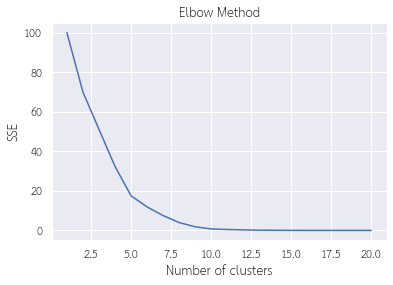

In [6]:
max_k = 21
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(k_mean_data_2564_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [7]:
k=5
# เพราะเป็นค่า Number of cluster ที่่ให้ความชันมากที่สุด

In [8]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(k_mean_data_2564_normalized)

KMeans(n_clusters=5)

In [9]:
cluster_predictions = kmeans.predict(k_mean_data_2564_normalized)
k_mean_data_2564['cluster_id'] = cluster_predictions
k_mean_data2_2564['cluster_id'] = cluster_predictions
k_mean_data_2564

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
1,4104.5,3078.3,6104.3,12397.0,13606.8,0
2,91027.4,24102.9,14426.1,4794.4,80179.8,3
3,12988.2,6567.9,3421.2,599.4,244863.5,4
4,2697.3,2509.6,397.5,1348.7,1203.3,0
5,1572.6,892.1,1564.4,735.9,1327.7,0
6,2746.6,2519.3,397.8,16598.3,79.8,0
7,11248.4,939.9,9956.4,104384.6,1597.7,0
8,24376.6,11495.8,72292.8,2001.1,564.8,2
9,9704.7,2436.2,177009.1,57.1,751.6,2
10,1311.6,2009.9,1243.4,1945.8,1791.0,0


In [10]:
k_mean_data_2564.cluster_id.value_counts()

0    13
3     3
2     2
4     1
1     1
Name: cluster_id, dtype: int64

In [11]:
print(metrics.silhouette_score(k_mean_data_2564,kmeans.labels_))
'''

    I.   S (i)ใกล้กับ 0 หมายความว่าจุดอยู่ระหว่างสองคลัสเตอร์
    II.  ถ้ามันใกล้ -1 มากขึ้นเราก็ควรกำหนดให้กับคลัสเตอร์อื่นดีกว่า
    III. ถ้าS (i)อยู่ใกล้ 1 แสดงว่าจุดนั้นเป็นของคลัสเตอร์ "ถูกต้อง"

'''

0.5172476961875423


'\n\n    I.   S (i)ใกล้กับ 0 หมายความว่าจุดอยู่ระหว่างสองคลัสเตอร์\n    II.  ถ้ามันใกล้ -1 มากขึ้นเราก็ควรกำหนดให้กับคลัสเตอร์อื่นดีกว่า\n    III. ถ้าS (i)อยู่ใกล้ 1 แสดงว่าจุดนั้นเป็นของคลัสเตอร์ "ถูกต้อง"\n\n'

In [12]:
print(metrics.davies_bouldin_score(k_mean_data_2564,kmeans.labels_))
# ยิ่งมีค่าน่อยยิ่งดี

0.5723699449455046


# K-mean 2564

In [13]:
k_mean_data2_2564[k_mean_data_2564.cluster_id==0]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
1,สำนักนายกรัฐมนตรี,4104.5,3078.3,6104.3,12397.0,13606.8,0
4,กระทรวงการต่างประเทศ,2697.3,2509.6,397.5,1348.7,1203.3,0
5,กระทรวงการท่องเที่ยวและกีฬา,1572.6,892.1,1564.4,735.9,1327.7,0
6,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2746.6,2519.3,397.8,16598.3,79.8,0
7,กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัยและนวัตกรรม,11248.4,939.9,9956.4,104384.6,1597.7,0
10,กระทรวงดิจิทัลเพื่อเสรษฐกิจและสังคม,1311.6,2009.9,1243.4,1945.8,1791.0,0
11,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10992.6,5199.8,10408.8,1103.6,1630.9,0
12,กระทรวงพลังงาน,822.0,531.2,707.8,30.7,187.5,0
13,กระทรวงพาณิชย์,2216.4,1585.4,845.4,479.5,1698.8,0
15,กระทรวงยุติธรรม,10363.6,8775.0,3333.1,1937.6,2418.8,0


In [14]:
k_mean_data_2564[k_mean_data_2564.cluster_id==0].mean()

งบบุคลากร         4285.000000
งบดําเนินงาน      2419.238462
งบลงทุน           2954.292308
งบเงินอุดหนุน    15838.707692
งบรายจ่ายอื่น     2189.023077
cluster_id           0.000000
dtype: float64

In [15]:
k_mean_data2_2564[k_mean_data_2564.cluster_id==1]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
14,กระทรวงมหาดไทย,19360.2,12718.1,38441.4,235503.6,28464.4,1


In [16]:
k_mean_data_2564[k_mean_data_2564.cluster_id==1].mean()

งบบุคลากร         19360.2
งบดําเนินงาน      12718.1
งบลงทุน           38441.4
งบเงินอุดหนุน    235503.6
งบรายจ่ายอื่น     28464.4
cluster_id            1.0
dtype: float64

In [17]:
k_mean_data2_2564[k_mean_data_2564.cluster_id==2]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
8,กระทรวงเกษตรเเละสหกรณ์,24376.6,11495.8,72292.8,2001.1,564.8,2
9,กระทรวงคมนาคม,9704.7,2436.2,177009.1,57.1,751.6,2


In [18]:
k_mean_data_2564[k_mean_data_2564.cluster_id==2].mean()

งบบุคลากร         17040.65
งบดําเนินงาน       6966.00
งบลงทุน          124650.95
งบเงินอุดหนุน      1029.10
งบรายจ่ายอื่น       658.20
cluster_id            2.00
dtype: float64

In [19]:
k_mean_data2_2564[k_mean_data_2564.cluster_id==3]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
2,กระทรวงกลาโหม,91027.4,24102.9,14426.1,4794.4,80179.8,3
18,กระทรวงศึกษาธิการ,223199.6,20029.5,19437.0,88628.9,5154.7,3
19,กระทรวงสาธารณสุข,107548.0,14411.4,17025.5,6637.5,179.9,3


In [20]:
k_mean_data_2564[k_mean_data_2564.cluster_id==3].mean()

งบบุคลากร        140591.666667
งบดําเนินงาน      19514.600000
งบลงทุน           16962.866667
งบเงินอุดหนุน     33353.600000
งบรายจ่ายอื่น     28504.800000
cluster_id            3.000000
dtype: float64

In [21]:
k_mean_data2_2564[k_mean_data_2564.cluster_id==4]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
3,กระทรวงการคลัง,12988.2,6567.9,3421.2,599.4,244863.5,4


In [22]:
k_mean_data_2564[k_mean_data_2564.cluster_id==4].mean()

งบบุคลากร         12988.2
งบดําเนินงาน       6567.9
งบลงทุน            3421.2
งบเงินอุดหนุน       599.4
งบรายจ่ายอื่น    244863.5
cluster_id            4.0
dtype: float64

# Hierarchical

In [23]:
Hierarchical_data_2564 = pd.read_excel('assignment2_clustering_data.xlsx',sheet_name='2564').drop([0,21,22,23,24,25,26,27,28,29,30,31,32]).drop("รวม",axis=1).drop("กระทรวง-งบรายจ่าย",axis=1)
Hierarchical_data2_2564 = pd.read_excel('assignment2_clustering_data.xlsx',sheet_name='2564').drop([0,21,22,23,24,25,26,27,28,29,30,31,32]).drop("รวม",axis=1)
Hierarchical_data_2564

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
1,4104.5,3078.3,6104.3,12397.0,13606.8
2,91027.4,24102.9,14426.1,4794.4,80179.8
3,12988.2,6567.9,3421.2,599.4,244863.5
4,2697.3,2509.6,397.5,1348.7,1203.3
5,1572.6,892.1,1564.4,735.9,1327.7
6,2746.6,2519.3,397.8,16598.3,79.8
7,11248.4,939.9,9956.4,104384.6,1597.7
8,24376.6,11495.8,72292.8,2001.1,564.8
9,9704.7,2436.2,177009.1,57.1,751.6
10,1311.6,2009.9,1243.4,1945.8,1791.0


In [24]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(Hierarchical_data_2564)
Hierarchical_data_2564_normalized = pd.DataFrame(array_normalized)
Hierarchical_data_2564_normalized.head()

,0,1,2,3,4
0,-0.434334,-0.456270,-0.323200,-0.261830,-0.106436
1,1.200658,2.655987,-0.115004,-0.396245,1.110209
2,-0.267235,0.060293,-0.390326,-0.470413,4.119859
3,-0.460803,-0.540454,-0.465973,-0.457166,-0.333114
4,-0.481959,-0.779892,-0.436780,-0.468000,-0.330840


In [25]:
# Set up parameter values
linkage_val = 'average'  # 'others are 'complete', 'single', 'ward'
dist_threshold_val = 0   # Set to be zero to plot dendrogram
nclusters_val = None     # if distance_threshold is 0, this must be None

In [26]:
model=AgglomerativeClustering(linkage=linkage_val,n_clusters=nclusters_val,distance_threshold=dist_threshold_val)
model=model.fit(Hierarchical_data_2564_normalized)
model

AgglomerativeClustering(distance_threshold=0, linkage='average',
                        n_clusters=None)

In [27]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

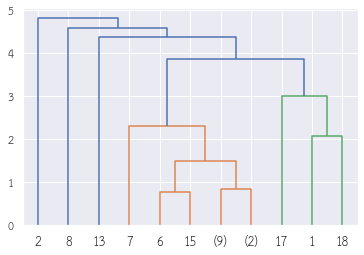

In [28]:
plot_dendrogram(model, truncate_mode='level', p=6)
#เลือก p=6 เพราะว่าหากเลือกต่ำกว่านี้จะไม่มีผลกับเลขจำนวนเต็ม

In [29]:
dist_threshold_val = 2
nclusters_val = None
#เลือก 2 เพราะว่าหากมากกว่านี้จะได้ค่า dist_threshold_val ต่ำกว่า 1

In [30]:
model=AgglomerativeClustering(linkage=linkage_val,n_clusters=nclusters_val,distance_threshold=dist_threshold_val)
model=model.fit(Hierarchical_data_2564_normalized)
model

AgglomerativeClustering(distance_threshold=2, linkage='average',
                        n_clusters=None)

In [31]:
labels = model.labels_
labels

array([0, 7, 3, 0, 0, 0, 0, 6, 5, 0, 0, 0, 0, 4, 0, 0, 0, 2, 1, 0],
      dtype=int64)

In [32]:
cluster_ids = pd.Series(labels).unique()
cluster_ids 

array([0, 7, 3, 6, 5, 4, 2, 1], dtype=int64)

In [33]:
cluster_predictions = model.fit_predict(Hierarchical_data_2564_normalized)
Hierarchical_data_2564['cluster_id'] = cluster_predictions
Hierarchical_data2_2564['cluster_id'] = cluster_predictions
Hierarchical_data_2564

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
1,4104.5,3078.3,6104.3,12397.0,13606.8,0
2,91027.4,24102.9,14426.1,4794.4,80179.8,7
3,12988.2,6567.9,3421.2,599.4,244863.5,3
4,2697.3,2509.6,397.5,1348.7,1203.3,0
5,1572.6,892.1,1564.4,735.9,1327.7,0
6,2746.6,2519.3,397.8,16598.3,79.8,0
7,11248.4,939.9,9956.4,104384.6,1597.7,0
8,24376.6,11495.8,72292.8,2001.1,564.8,6
9,9704.7,2436.2,177009.1,57.1,751.6,5
10,1311.6,2009.9,1243.4,1945.8,1791.0,0


In [34]:
print(metrics.silhouette_score(Hierarchical_data_2564,labels))

0.4147178198095811


In [35]:
print(metrics.davies_bouldin_score(Hierarchical_data_2564,model.labels_))

0.18039465204900068


In [36]:
Hierarchical_data2_2564[Hierarchical_data_2564.cluster_id==0]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
1,สำนักนายกรัฐมนตรี,4104.5,3078.3,6104.3,12397.0,13606.8,0
4,กระทรวงการต่างประเทศ,2697.3,2509.6,397.5,1348.7,1203.3,0
5,กระทรวงการท่องเที่ยวและกีฬา,1572.6,892.1,1564.4,735.9,1327.7,0
6,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2746.6,2519.3,397.8,16598.3,79.8,0
7,กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัยและนวัตกรรม,11248.4,939.9,9956.4,104384.6,1597.7,0
10,กระทรวงดิจิทัลเพื่อเสรษฐกิจและสังคม,1311.6,2009.9,1243.4,1945.8,1791.0,0
11,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10992.6,5199.8,10408.8,1103.6,1630.9,0
12,กระทรวงพลังงาน,822.0,531.2,707.8,30.7,187.5,0
13,กระทรวงพาณิชย์,2216.4,1585.4,845.4,479.5,1698.8,0
15,กระทรวงยุติธรรม,10363.6,8775.0,3333.1,1937.6,2418.8,0


In [37]:
Hierarchical_data2_2564[Hierarchical_data_2564.cluster_id==0].mean()

C:\Users\TTCOM\AppData\Local\Temp\ipykernel_19732\1599429083.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Hierarchical_data2_2564[Hierarchical_data_2564.cluster_id==0].mean()


งบบุคลากร         4285.000000
งบดําเนินงาน      2419.238462
งบลงทุน           2954.292308
งบเงินอุดหนุน    15838.707692
งบรายจ่ายอื่น     2189.023077
cluster_id           0.000000
dtype: float64

In [38]:
Hierarchical_data2_2564[Hierarchical_data_2564.cluster_id==1]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
19,กระทรวงสาธารณสุข,107548.0,14411.4,17025.5,6637.5,179.9,1


In [39]:
Hierarchical_data2_2564[Hierarchical_data_2564.cluster_id==1].mean()

C:\Users\TTCOM\AppData\Local\Temp\ipykernel_19732\1219640079.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Hierarchical_data2_2564[Hierarchical_data_2564.cluster_id==1].mean()


งบบุคลากร        107548.0
งบดําเนินงาน      14411.4
งบลงทุน           17025.5
งบเงินอุดหนุน      6637.5
งบรายจ่ายอื่น       179.9
cluster_id            1.0
dtype: float64

In [40]:
Hierarchical_data2_2564[Hierarchical_data_2564.cluster_id==2]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
18,กระทรวงศึกษาธิการ,223199.6,20029.5,19437.0,88628.9,5154.7,2


In [41]:
Hierarchical_data2_2564[Hierarchical_data_2564.cluster_id==2].mean()


C:\Users\TTCOM\AppData\Local\Temp\ipykernel_19732\1906456801.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Hierarchical_data2_2564[Hierarchical_data_2564.cluster_id==2].mean()


งบบุคลากร        223199.6
งบดําเนินงาน      20029.5
งบลงทุน           19437.0
งบเงินอุดหนุน     88628.9
งบรายจ่ายอื่น      5154.7
cluster_id            2.0
dtype: float64

In [42]:
Hierarchical_data2_2564[Hierarchical_data_2564.cluster_id==3]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
3,กระทรวงการคลัง,12988.2,6567.9,3421.2,599.4,244863.5,3


In [43]:
Hierarchical_data2_2564[Hierarchical_data_2564.cluster_id==3].mean()

C:\Users\TTCOM\AppData\Local\Temp\ipykernel_19732\2440543686.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Hierarchical_data2_2564[Hierarchical_data_2564.cluster_id==3].mean()


งบบุคลากร         12988.2
งบดําเนินงาน       6567.9
งบลงทุน            3421.2
งบเงินอุดหนุน       599.4
งบรายจ่ายอื่น    244863.5
cluster_id            3.0
dtype: float64

In [44]:
Hierarchical_data2_2564[Hierarchical_data_2564.cluster_id==4]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
14,กระทรวงมหาดไทย,19360.2,12718.1,38441.4,235503.6,28464.4,4


In [45]:
Hierarchical_data2_2564[Hierarchical_data_2564.cluster_id==4].mean()

C:\Users\TTCOM\AppData\Local\Temp\ipykernel_19732\3097207072.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Hierarchical_data2_2564[Hierarchical_data_2564.cluster_id==4].mean()


งบบุคลากร         19360.2
งบดําเนินงาน      12718.1
งบลงทุน           38441.4
งบเงินอุดหนุน    235503.6
งบรายจ่ายอื่น     28464.4
cluster_id            4.0
dtype: float64

In [46]:
Hierarchical_data2_2564[Hierarchical_data_2564.cluster_id==5]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
9,กระทรวงคมนาคม,9704.7,2436.2,177009.1,57.1,751.6,5


In [47]:
Hierarchical_data2_2564[Hierarchical_data_2564.cluster_id==5].mean()

C:\Users\TTCOM\AppData\Local\Temp\ipykernel_19732\3390859659.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Hierarchical_data2_2564[Hierarchical_data_2564.cluster_id==5].mean()


งบบุคลากร          9704.7
งบดําเนินงาน       2436.2
งบลงทุน          177009.1
งบเงินอุดหนุน        57.1
งบรายจ่ายอื่น       751.6
cluster_id            5.0
dtype: float64

In [48]:
Hierarchical_data2_2564[Hierarchical_data_2564.cluster_id==6]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
8,กระทรวงเกษตรเเละสหกรณ์,24376.6,11495.8,72292.8,2001.1,564.8,6


In [49]:
Hierarchical_data2_2564[Hierarchical_data_2564.cluster_id==6].mean()

C:\Users\TTCOM\AppData\Local\Temp\ipykernel_19732\2483991979.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Hierarchical_data2_2564[Hierarchical_data_2564.cluster_id==6].mean()


งบบุคลากร        24376.6
งบดําเนินงาน     11495.8
งบลงทุน          72292.8
งบเงินอุดหนุน     2001.1
งบรายจ่ายอื่น      564.8
cluster_id           6.0
dtype: float64

In [50]:
Hierarchical_data2_2564[Hierarchical_data_2564.cluster_id==7]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
2,กระทรวงกลาโหม,91027.4,24102.9,14426.1,4794.4,80179.8,7


In [51]:
Hierarchical_data2_2564[Hierarchical_data_2564.cluster_id==7].mean()

C:\Users\TTCOM\AppData\Local\Temp\ipykernel_19732\1742066667.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Hierarchical_data2_2564[Hierarchical_data_2564.cluster_id==7].mean()


งบบุคลากร        91027.4
งบดําเนินงาน     24102.9
งบลงทุน          14426.1
งบเงินอุดหนุน     4794.4
งบรายจ่ายอื่น    80179.8
cluster_id           7.0
dtype: float64

# DBScan

In [52]:
DBScan_data_2564 = pd.read_excel('assignment2_clustering_data.xlsx',sheet_name='2564').drop([0,21,22,23,24,25,26,27,28,29,30,31,32]).drop("รวม",axis=1).drop("กระทรวง-งบรายจ่าย",axis=1)
DBScan_data2_2564 = pd.read_excel('assignment2_clustering_data.xlsx',sheet_name='2564').drop([0,21,22,23,24,25,26,27,28,29,30,31,32]).drop("รวม",axis=1)
DBScan_data_2564

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
1,4104.5,3078.3,6104.3,12397.0,13606.8
2,91027.4,24102.9,14426.1,4794.4,80179.8
3,12988.2,6567.9,3421.2,599.4,244863.5
4,2697.3,2509.6,397.5,1348.7,1203.3
5,1572.6,892.1,1564.4,735.9,1327.7
6,2746.6,2519.3,397.8,16598.3,79.8
7,11248.4,939.9,9956.4,104384.6,1597.7
8,24376.6,11495.8,72292.8,2001.1,564.8
9,9704.7,2436.2,177009.1,57.1,751.6
10,1311.6,2009.9,1243.4,1945.8,1791.0


In [53]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(DBScan_data_2564)
DBScan_data_2564_normalized = pd.DataFrame(array_normalized)
DBScan_data_2564_normalized.head()

,0,1,2,3,4
0,-0.434334,-0.456270,-0.323200,-0.261830,-0.106436
1,1.200658,2.655987,-0.115004,-0.396245,1.110209
2,-0.267235,0.060293,-0.390326,-0.470413,4.119859
3,-0.460803,-0.540454,-0.465973,-0.457166,-0.333114
4,-0.481959,-0.779892,-0.436780,-0.468000,-0.330840


In [54]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbor_model = neighbors.fit(DBScan_data_2564_normalized)
distances, indices = neighbor_model.kneighbors(DBScan_data_2564_normalized)
distances

array([[0.        , 0.30742844],
       [0.        , 2.07304746],
       [0.        , 4.24636778],
       [0.        , 0.08261737],
       [0.        , 0.04861594],
       [0.        , 0.27040136],
       [0.        , 0.77417461],
       [0.        , 1.79144992],
       [0.        , 2.95621947],
       [0.        , 0.07079815],
       [0.        , 0.46343997],
       [0.        , 0.0307278 ],
       [0.        , 0.04765692],
       [0.        , 3.03086549],
       [0.        , 0.55856078],
       [0.        , 0.77417461],
       [0.        , 0.04765692],
       [0.        , 2.74539142],
       [0.        , 2.04051061],
       [0.        , 0.0307278 ]])

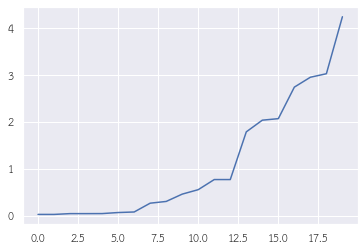

In [55]:
distances = np.sort(distances, axis=0)
plt.plot(distances[:,1])

In [56]:
# Choose value for eps and min_samples
eps_value = 3.5
min_sample_value = 4

In [57]:
dbscan=DBSCAN(eps=eps_value,min_samples=min_sample_value)
model=dbscan.fit(DBScan_data_2564_normalized)

In [58]:
labels = model.labels_
labels

array([ 0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0], dtype=int64)

In [59]:
cluster_ids = pd.Series(labels).unique()
cluster_ids 

array([ 0, -1], dtype=int64)

In [60]:
n_clusters=len(cluster_ids)-1   # -1 = noise
n_clusters

1

In [61]:
cluster_predictions = dbscan.fit_predict(DBScan_data_2564_normalized)
DBScan_data_2564['cluster_id'] = cluster_predictions
DBScan_data2_2564['cluster_id'] = cluster_predictions
DBScan_data_2564.tail(10)

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
11,10992.6,5199.8,10408.8,1103.6,1630.9,0
12,822.0,531.2,707.8,30.7,187.5,0
13,2216.4,1585.4,845.4,479.5,1698.8,0
14,19360.2,12718.1,38441.4,235503.6,28464.4,0
15,10363.6,8775.0,3333.1,1937.6,2418.8,0
16,3671.6,1375.7,375.7,63712.9,584.4,0
17,2321.9,1430.5,2325.4,1070.7,814.4,0
18,223199.6,20029.5,19437.0,88628.9,5154.7,0
19,107548.0,14411.4,17025.5,6637.5,179.9,0
20,1635.9,603.4,745.8,157.9,1516.2,0


In [62]:
print(metrics.silhouette_score(DBScan_data_2564,labels))

0.5756583636165525


In [63]:
print(metrics.davies_bouldin_score(DBScan_data_2564,model.labels_))

0.303951799985643


In [64]:
DBScan_data2_2564[DBScan_data_2564.cluster_id==0]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
1,สำนักนายกรัฐมนตรี,4104.5,3078.3,6104.3,12397.0,13606.8,0
2,กระทรวงกลาโหม,91027.4,24102.9,14426.1,4794.4,80179.8,0
4,กระทรวงการต่างประเทศ,2697.3,2509.6,397.5,1348.7,1203.3,0
5,กระทรวงการท่องเที่ยวและกีฬา,1572.6,892.1,1564.4,735.9,1327.7,0
6,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2746.6,2519.3,397.8,16598.3,79.8,0
7,กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัยและนวัตกรรม,11248.4,939.9,9956.4,104384.6,1597.7,0
8,กระทรวงเกษตรเเละสหกรณ์,24376.6,11495.8,72292.8,2001.1,564.8,0
9,กระทรวงคมนาคม,9704.7,2436.2,177009.1,57.1,751.6,0
10,กระทรวงดิจิทัลเพื่อเสรษฐกิจและสังคม,1311.6,2009.9,1243.4,1945.8,1791.0,0
11,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10992.6,5199.8,10408.8,1103.6,1630.9,0


In [65]:
DBScan_data2_2564[DBScan_data_2564.cluster_id==0].mean()

C:\Users\TTCOM\AppData\Local\Temp\ipykernel_19732\2865234778.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  DBScan_data2_2564[DBScan_data_2564.cluster_id==0].mean()


งบบุคลากร        27943.236842
งบดําเนินงาน      6139.157895
งบลงทุน          19844.089474
งบเงินอุดหนุน    28606.621053
งบรายจ่ายอื่น     7565.921053
cluster_id           0.000000
dtype: float64

In [66]:
DBScan_data2_2564[DBScan_data_2564.cluster_id==-1]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
3,กระทรวงการคลัง,12988.2,6567.9,3421.2,599.4,244863.5,-1


In [67]:
DBScan_data2_2564[DBScan_data_2564.cluster_id==-1].mean()

C:\Users\TTCOM\AppData\Local\Temp\ipykernel_19732\202099054.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  DBScan_data2_2564[DBScan_data_2564.cluster_id==-1].mean()


งบบุคลากร         12988.2
งบดําเนินงาน       6567.9
งบลงทุน            3421.2
งบเงินอุดหนุน       599.4
งบรายจ่ายอื่น    244863.5
cluster_id           -1.0
dtype: float64

# Part 2

ใช้งบประมาณรายจ่ายส่วนย่อย 5 ด้าน ในปี 2560-2564  จัดกลุ่มกระทรวงตามงบประมาณรายจ่าย แยกตามปี (ไม่รวมทุกปีเข้าด้วยกัน)  ด้วยวิธี K-mean


# K-menn 2560

In [68]:
'''

    2560

'''

'\n\n    2560\n\n'

In [69]:
k_mean_data_2560 = pd.read_excel('assignment2_clustering_data.xlsx',sheet_name='2560').drop([0,21,22,23,24,25,26,27,28,29,30]).drop("รวม",axis=1).drop("กระทรวง-งบรายจ่าย",axis=1)
k_mean_data2_2560 = pd.read_excel('assignment2_clustering_data.xlsx',sheet_name='2560').drop([0,21,22,23,24,25,26,27,28,29,30]).drop("รวม",axis=1)
k_mean_data_2560

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
1,3894.0,2853.3,4777.3,9458.4,14429.3
2,90837.3,25772.7,8398.4,3536.4,84905.1
3,12014.6,6188.9,3343.7,238.8,195927.6
4,2997.4,2590.2,604.2,1147.2,1370.6
5,1424.4,1113.7,1658.1,405.3,1946.9
6,2667.9,3401.0,952.7,4419.3,219.1
7,25027.8,14022.7,46346.7,1952.3,917.9
8,9248.9,2344.5,137892.7,462.3,801.6
9,10468.6,6712.3,12880.3,2224.8,1435.0
10,1164.5,809.1,978.4,2263.6,2468.6


In [70]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(k_mean_data_2560)
k_mean_data_2560_normalized = pd.DataFrame(array_normalized)
k_mean_data_2560_normalized.head()


,0,1,2,3,4
0,-0.395078,-0.470021,-0.344301,-0.251257,-0.069280
1,1.080991,1.981045,-0.227101,-0.344663,1.496412
2,-0.257211,-0.113303,-0.390701,-0.396675,3.962891
3,-0.410300,-0.498158,-0.479367,-0.382347,-0.359393
4,-0.437005,-0.656059,-0.445257,-0.394049,-0.346590


Text(0, 0.5, 'SSE')

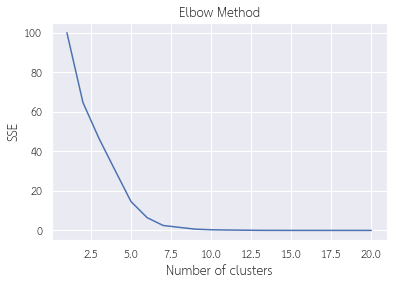

In [71]:
max_k = 21
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(k_mean_data_2560_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [72]:
k=5
# เพราะเป็นค่า Number of cluster ที่่ให้ความชันมากที่สุด

In [73]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(k_mean_data_2560_normalized)

KMeans(n_clusters=5)

In [74]:
cluster_predictions = kmeans.predict(k_mean_data_2560_normalized)
k_mean_data_2560['cluster_id'] = cluster_predictions
k_mean_data2_2560['cluster_id'] = cluster_predictions
k_mean_data_2560

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
1,3894.0,2853.3,4777.3,9458.4,14429.3,0
2,90837.3,25772.7,8398.4,3536.4,84905.1,1
3,12014.6,6188.9,3343.7,238.8,195927.6,1
4,2997.4,2590.2,604.2,1147.2,1370.6,0
5,1424.4,1113.7,1658.1,405.3,1946.9,0
6,2667.9,3401.0,952.7,4419.3,219.1,0
7,25027.8,14022.7,46346.7,1952.3,917.9,0
8,9248.9,2344.5,137892.7,462.3,801.6,4
9,10468.6,6712.3,12880.3,2224.8,1435.0,0
10,1164.5,809.1,978.4,2263.6,2468.6,0


In [75]:
k_mean_data_2560.cluster_id.value_counts()

0    15
1     2
4     1
2     1
3     1
Name: cluster_id, dtype: int64

In [76]:
print(metrics.silhouette_score(k_mean_data_2560,kmeans.labels_))

0.597145048995666


In [77]:
print(metrics.davies_bouldin_score(k_mean_data_2560,kmeans.labels_))

0.4105088356356008


# K-mean 2560 all cluster

In [78]:
k_mean_data2_2560[k_mean_data_2560.cluster_id==0]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
1,สำนักนายกรัฐมนตรี,3894.0,2853.3,4777.3,9458.4,14429.3,0
4,กระทรวงการต่างประเทศ,2997.4,2590.2,604.2,1147.2,1370.6,0
5,กระทรวงการท่องเที่ยวและกีฬา,1424.4,1113.7,1658.1,405.3,1946.9,0
6,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2667.9,3401.0,952.7,4419.3,219.1,0
7,กระทรวงเกษตรเเละสหกรณ์,25027.8,14022.7,46346.7,1952.3,917.9,0
9,ระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10468.6,6712.3,12880.3,2224.8,1435.0,0
10,ระทรวงเทคโนโลยีสารสนเทศและการสื่อสาร,1164.5,809.1,978.4,2263.6,2468.6,0
11,กระทรวงพลังงาน,783.7,542.2,451.3,24.7,251.1,0
12,กระทรวงพาณิชย์,2215.6,1969.0,411.8,623.0,1815.3,0
14,กระทรวงยุติธรรม,8618.7,8988.1,3128.0,931.0,1885.0,0


In [79]:
k_mean_data_2560[k_mean_data_2560.cluster_id==0].mean()

งบบุคลากร        10392.093333
งบดําเนินงาน      4068.486667
งบลงทุน           6386.733333
งบเงินอุดหนุน     5462.213333
งบรายจ่ายอื่น     2167.346667
cluster_id           0.000000
dtype: float64

In [80]:
k_mean_data2_2560[k_mean_data_2560.cluster_id==1]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
2,กระทรวงกลาโหม,90837.3,25772.7,8398.4,3536.4,84905.1,1
3,กระทรวงการคลัง,12014.6,6188.9,3343.7,238.8,195927.6,1


In [81]:
k_mean_data_2560[k_mean_data_2560.cluster_id==1].mean()

งบบุคลากร         51425.95
งบดําเนินงาน      15980.80
งบลงทุน            5871.05
งบเงินอุดหนุน      1887.60
งบรายจ่ายอื่น    140416.35
cluster_id            1.00
dtype: float64

In [82]:
k_mean_data2_2560[k_mean_data_2560.cluster_id==2]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
13,กระทรวงมหาดไทย,17293.9,12809.2,29055.5,246083.2,27566.7,2


In [83]:
k_mean_data_2560[k_mean_data_2560.cluster_id==2].mean()

งบบุคลากร         17293.9
งบดําเนินงาน      12809.2
งบลงทุน           29055.5
งบเงินอุดหนุน    246083.2
งบรายจ่ายอื่น     27566.7
cluster_id            2.0
dtype: float64

In [84]:
k_mean_data2_2560[k_mean_data_2560.cluster_id==3]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
18,กระทรวงศึกษาธิการ,258020.8,36824.8,33810.3,175509.7,9244.4,3


In [85]:
k_mean_data_2560[k_mean_data_2560.cluster_id==3].mean()

งบบุคลากร        258020.8
งบดําเนินงาน      36824.8
งบลงทุน           33810.3
งบเงินอุดหนุน    175509.7
งบรายจ่ายอื่น      9244.4
cluster_id            3.0
dtype: float64

# K-menn 2561

In [86]:
'''

    2561

'''

'\n\n    2561\n\n'

In [87]:
k_mean_data_2561 = pd.read_excel('assignment2_clustering_data.xlsx',sheet_name='2561').drop([0,21,22,23,24,25,26,27,28,29,30]).drop("รวม",axis=1).drop("กระทรวง-งบรายจ่าย",axis=1)
k_mean_data2_2561 = pd.read_excel('assignment2_clustering_data.xlsx',sheet_name='2561').drop([0,21,22,23,24,25,26,27,28,29,30]).drop("รวม",axis=1)
k_mean_data_2561

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
1,3941.3,2770.8,3682.2,9474.7,14005.7
2,91153.1,25039.5,9544.1,6610.7,88176.3
3,12235.8,6177.6,3177.1,89.2,216561.9
4,3045.3,2534.2,574.0,1182.7,1425.3
5,1342.8,1107.3,1911.2,340.1,1921.5
6,2652.9,3542.9,1383.2,5951.5,187.0
7,25019.6,15538.5,55276.8,3139.3,856.5
8,9492.6,2308.9,156059.3,268.4,638.8
9,1163.7,1163.4,1379.2,2587.1,277.8
10,10632.0,6284.7,12447.3,2493.2,1787.5


In [88]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(k_mean_data_2561)
k_mean_data_2561_normalized = pd.DataFrame(array_normalized)
k_mean_data_2561_normalized.head()

,0,1,2,3,4
0,-0.400287,-0.491456,-0.382696,-0.263163,-0.093725
1,1.113194,2.038018,-0.214987,-0.305846,1.407207
2,-0.256344,-0.104482,-0.397147,-0.403037,4.005245
3,-0.415836,-0.518331,-0.471622,-0.386741,-0.348305
4,-0.445382,-0.680411,-0.433365,-0.399298,-0.338263


Text(0, 0.5, 'SSE')

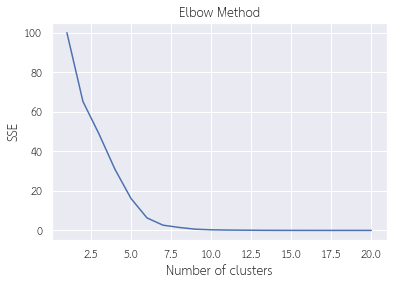

In [89]:
max_k = 21
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(k_mean_data_2561_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')


In [90]:
k=5
# เพราะเป็นค่า Number of cluster ที่่ให้ความชันมากที่สุด

In [91]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(k_mean_data_2561_normalized)

KMeans(n_clusters=5)

In [92]:
cluster_predictions = kmeans.predict(k_mean_data_2561_normalized)
k_mean_data_2561['cluster_id'] = cluster_predictions
k_mean_data2_2561['cluster_id'] = cluster_predictions
k_mean_data_2561

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
1,3941.3,2770.8,3682.2,9474.7,14005.7,0
2,91153.1,25039.5,9544.1,6610.7,88176.3,1
3,12235.8,6177.6,3177.1,89.2,216561.9,1
4,3045.3,2534.2,574.0,1182.7,1425.3,0
5,1342.8,1107.3,1911.2,340.1,1921.5,0
6,2652.9,3542.9,1383.2,5951.5,187.0,0
7,25019.6,15538.5,55276.8,3139.3,856.5,0
8,9492.6,2308.9,156059.3,268.4,638.8,3
9,1163.7,1163.4,1379.2,2587.1,277.8,0
10,10632.0,6284.7,12447.3,2493.2,1787.5,0


In [93]:
k_mean_data_2561.cluster_id.value_counts()

0    15
1     2
3     1
4     1
2     1
Name: cluster_id, dtype: int64

In [94]:
print(metrics.silhouette_score(k_mean_data_2561,kmeans.labels_))

0.6010649461816929


In [95]:
print(metrics.davies_bouldin_score(k_mean_data_2561,kmeans.labels_))

0.41979863122186717


# K-mean 2561 all cluster

In [96]:
k_mean_data2_2561[k_mean_data_2561.cluster_id==0]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
1,สำนักนายกรัฐมนตรี,3941.3,2770.8,3682.2,9474.7,14005.7,0
4,กระทรวงการต่างประเทศ,3045.3,2534.2,574.0,1182.7,1425.3,0
5,กระทรวงการท่องเที่ยวและกีฬา,1342.8,1107.3,1911.2,340.1,1921.5,0
6,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2652.9,3542.9,1383.2,5951.5,187.0,0
7,กระทรวงเกษตรและสหกรณ์,25019.6,15538.5,55276.8,3139.3,856.5,0
9,กระทรวงดิจิทัลเพื่อเศรษฐกิจและสังคม,1163.7,1163.4,1379.2,2587.1,277.8,0
10,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10632.0,6284.7,12447.3,2493.2,1787.5,0
11,กระทรวงพลังงาน,785.1,542.7,544.0,24.5,324.8,0
12,กระทรวงพาณิชย์,2208.7,1716.8,396.2,637.0,2115.0,0
14,กระทรวงยุติธรรม,8775.7,8648.1,4094.6,1014.6,1947.8,0


In [97]:
k_mean_data_2561[k_mean_data_2561.cluster_id==0].mean()

งบบุคลากร        10579.480000
งบดําเนินงาน      4081.533333
งบลงทุน           7230.226667
งบเงินอุดหนุน     6038.566667
งบรายจ่ายอื่น     1995.420000
cluster_id           0.000000
dtype: float64

In [98]:
k_mean_data2_2561[k_mean_data_2561.cluster_id==1]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
2,กระทรวงกลาโหม,91153.1,25039.5,9544.1,6610.7,88176.3,1
3,กระทรวงการคลัง,12235.8,6177.6,3177.1,89.2,216561.9,1


In [99]:
k_mean_data_2561[k_mean_data_2561.cluster_id==1].mean()

งบบุคลากร         51694.45
งบดําเนินงาน      15608.55
งบลงทุน            6360.60
งบเงินอุดหนุน      3349.95
งบรายจ่ายอื่น    152369.10
cluster_id            1.00
dtype: float64

In [100]:
k_mean_data2_2561[k_mean_data_2561.cluster_id==2]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
18,กระทรวงศึกษาธิการ,250754.5,33148.8,34287.6,180797.9,8958.9,2


In [101]:
k_mean_data_2561[k_mean_data_2561.cluster_id==2].mean()

งบบุคลากร        250754.5
งบดําเนินงาน      33148.8
งบลงทุน           34287.6
งบเงินอุดหนุน    180797.9
งบรายจ่ายอื่น      8958.9
cluster_id            2.0
dtype: float64

In [102]:
k_mean_data2_2561[k_mean_data_2561.cluster_id==3]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
8,กระทรวงคมนาคม,9492.6,2308.9,156059.3,268.4,638.8,3


In [103]:
k_mean_data_2561[k_mean_data_2561.cluster_id==3].mean()

งบบุคลากร          9492.6
งบดําเนินงาน       2308.9
งบลงทุน          156059.3
งบเงินอุดหนุน       268.4
งบรายจ่ายอื่น       638.8
cluster_id            3.0
dtype: float64

# K-mean 2562

In [104]:
'''

    2562

'''

'\n\n    2562\n\n'

In [105]:
k_mean_data_2562 = pd.read_excel('assignment2_clustering_data.xlsx',sheet_name='2562').drop([0,21,22,23,24,25,26,27,28,29,30]).drop("รวม",axis=1).drop("กระทรวง-งบรายจ่าย",axis=1)
k_mean_data2_2562 = pd.read_excel('assignment2_clustering_data.xlsx',sheet_name='2562').drop([0,21,22,23,24,25,26,27,28,29,30]).drop("รวม",axis=1)
k_mean_data_2562

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
1,3954.7,2962.6,6772.5,11813.6,15327.0
2,93590.8,24735.3,11188.3,5377.5,92234.7
3,12679.7,6433.3,3326.1,753.0,219755.9
4,2951.1,2577.8,419.5,1409.3,1839.6
5,1509.6,1111.2,1441.6,369.5,1643.1
6,2741.8,2998.5,915.5,6510.5,176.3
7,24739.8,14596.1,65676.5,2979.3,1005.2
8,9472.2,2468.7,166867.5,45.9,744.3
9,1233.6,896.1,1243.2,1773.2,267.3
10,10875.0,6189.6,11026.6,948.3,1653.1


In [106]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(k_mean_data_2562)
k_mean_data_2562_normalized = pd.DataFrame(array_normalized)
k_mean_data_2562_normalized.head()

,0,1,2,3,4
0,-0.412334,-0.478227,-0.297626,-0.232150,-0.074798
1,1.203523,2.213682,-0.180440,-0.324660,1.453035
2,-0.255050,-0.049120,-0.389086,-0.391131,3.986346
3,-0.430426,-0.525802,-0.466221,-0.381698,-0.342736
4,-0.456412,-0.707128,-0.439097,-0.396644,-0.346640


Text(0, 0.5, 'SSE')

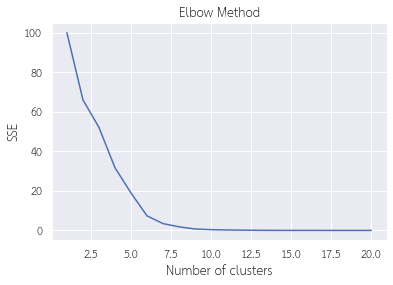

In [107]:
max_k = 21
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(k_mean_data_2562_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [108]:
k=5
# เพราะเป็นค่า Number of cluster ที่่ให้ความชันมากที่สุด

In [109]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(k_mean_data_2562_normalized)

KMeans(n_clusters=5)

In [110]:
cluster_predictions = kmeans.predict(k_mean_data_2562_normalized)
k_mean_data_2562['cluster_id'] = cluster_predictions
k_mean_data2_2562['cluster_id'] = cluster_predictions
k_mean_data_2562

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
1,3954.7,2962.6,6772.5,11813.6,15327.0,0
2,93590.8,24735.3,11188.3,5377.5,92234.7,2
3,12679.7,6433.3,3326.1,753.0,219755.9,2
4,2951.1,2577.8,419.5,1409.3,1839.6,0
5,1509.6,1111.2,1441.6,369.5,1643.1,0
6,2741.8,2998.5,915.5,6510.5,176.3,0
7,24739.8,14596.1,65676.5,2979.3,1005.2,0
8,9472.2,2468.7,166867.5,45.9,744.3,3
9,1233.6,896.1,1243.2,1773.2,267.3,0
10,10875.0,6189.6,11026.6,948.3,1653.1,0


In [111]:
k_mean_data_2562.cluster_id.value_counts()

0    15
2     2
3     1
4     1
1     1
Name: cluster_id, dtype: int64

In [112]:
print(metrics.silhouette_score(k_mean_data_2562,kmeans.labels_))

print(metrics.davies_bouldin_score(k_mean_data_2562,kmeans.labels_))

0.5977397171369866
0.41470549205932034


# K-mean 2562 all cluseter

In [113]:
k_mean_data2_2562[k_mean_data_2562.cluster_id==0]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
1,สำนักนายกรัฐมนตรี,3954.7,2962.6,6772.5,11813.6,15327.0,0
4,กระทรวงการต่างประเทศ,2951.1,2577.8,419.5,1409.3,1839.6,0
5,กระทรวงการท่องเที่ยวและกีฬา,1509.6,1111.2,1441.6,369.5,1643.1,0
6,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2741.8,2998.5,915.5,6510.5,176.3,0
7,กระทรวงเกษตรและสหกรณ์,24739.8,14596.1,65676.5,2979.3,1005.2,0
9,กระทรวงดิจิทัลเพื่อเศรษฐกิจและสังคม,1233.6,896.1,1243.2,1773.2,267.3,0
10,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,10875.0,6189.6,11026.6,948.3,1653.1,0
11,กระทรวงพลังงาน,788.6,528.1,641.0,34.3,309.0,0
12,กระทรวงพาณิชย์,2219.5,1609.1,453.2,650.9,1956.5,0
14,กระทรวงยุติธรรม,9734.9,9147.3,3123.0,950.8,2187.9,0


In [114]:
k_mean_data_2562[k_mean_data_2562.cluster_id==0].mean()

งบบุคลากร        10954.713333
งบดําเนินงาน      4044.746667
งบลงทุน           7608.073333
งบเงินอุดหนุน     6335.653333
งบรายจ่ายอื่น     2052.773333
cluster_id           0.000000
dtype: float64

In [115]:
k_mean_data2_2562[k_mean_data_2562.cluster_id==1]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
18,กระทรวงศึกษาธิการ,237718.1,28233.1,32548.7,179311.0,9835.5,1


In [116]:
k_mean_data_2562[k_mean_data_2562.cluster_id==1].mean()

งบบุคลากร        237718.1
งบดําเนินงาน      28233.1
งบลงทุน           32548.7
งบเงินอุดหนุน    179311.0
งบรายจ่ายอื่น      9835.5
cluster_id            1.0
dtype: float64

In [117]:
k_mean_data2_2562[k_mean_data_2562.cluster_id==2]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
2,กระทรวงกลาโหม,93590.8,24735.3,11188.3,5377.5,92234.7,2
3,กระทรวงการคลัง,12679.7,6433.3,3326.1,753.0,219755.9,2


In [118]:
k_mean_data_2562[k_mean_data_2562.cluster_id==2].mean()

งบบุคลากร         53135.25
งบดําเนินงาน      15584.30
งบลงทุน            7257.20
งบเงินอุดหนุน      3065.25
งบรายจ่ายอื่น    155995.30
cluster_id            2.00
dtype: float64

In [119]:
k_mean_data2_2562[k_mean_data_2562.cluster_id==3]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
8,กระทรวงคมนาคม,9472.2,2468.7,166867.5,45.9,744.3,3


In [120]:
k_mean_data_2562[k_mean_data_2562.cluster_id==3].mean()

งบบุคลากร          9472.2
งบดําเนินงาน       2468.7
งบลงทุน          166867.5
งบเงินอุดหนุน        45.9
งบรายจ่ายอื่น       744.3
cluster_id            3.0
dtype: float64

In [121]:
k_mean_data2_2562[k_mean_data_2562.cluster_id==4]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
13,กระทรวงมหาดไทย,18779.3,14070.3,31700.4,278770.1,28481.6,4


In [122]:
k_mean_data_2562[k_mean_data_2562.cluster_id==4].mean()

งบบุคลากร         18779.3
งบดําเนินงาน      14070.3
งบลงทุน           31700.4
งบเงินอุดหนุน    278770.1
งบรายจ่ายอื่น     28481.6
cluster_id            4.0
dtype: float64

# k-mean 2563

In [123]:
'''

    2563

'''

'\n\n    2563\n\n'

In [124]:
k_mean_data_2563 = pd.read_excel('assignment2_clustering_data.xlsx',sheet_name='2563').drop([0,21,22,23,24,25,26,27,28,29,30,31,32,33]).drop("รวม",axis=1).drop("กระทรวง-งบรายจ่าย",axis=1)
k_mean_data2_2563 = pd.read_excel('assignment2_clustering_data.xlsx',sheet_name='2563').drop([0,21,22,23,24,25,26,27,28,29,30,31,32,33]).drop("รวม",axis=1)
k_mean_data_2563

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
1,4076.1,3087.5,6567.2,10321.9,15056.2
2,92346.6,24777.8,15433.6,5162.5,95632.9
3,13093.2,6734.3,3108.5,873.7,225866.3
4,2754.0,2558.6,468.3,1483.9,1662.8
5,1552.5,1068.9,1315.9,740.8,1393.2
6,2745.1,2812.2,645.1,14924.3,154.9
7,11700.1,1012.7,9091.6,104146.9,1944.2
8,24706.3,13751.9,67815.5,2700.8,859.2
9,9684.5,2500.4,165887.2,59.1,708.9
10,1273.4,1517.0,1385.6,1927.9,794.0


In [125]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(k_mean_data_2563)
k_mean_data_2563_normalized = pd.DataFrame(array_normalized)
k_mean_data_2563_normalized.head()

,0,1,2,3,4
0,-0.429076,-0.479867,-0.313928,-0.288389,-0.086763
1,1.207059,2.623786,-0.076730,-0.374074,1.468457
2,-0.261940,0.041952,-0.406457,-0.445300,3.982107
3,-0.453582,-0.555547,-0.477089,-0.435166,-0.345271
4,-0.475852,-0.768707,-0.454414,-0.447507,-0.350474


Text(0, 0.5, 'SSE')

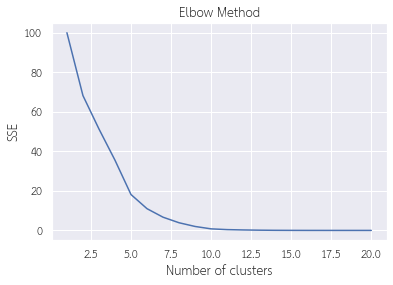

In [126]:
max_k = 21
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(k_mean_data_2563_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [127]:
k=5
# เพราะเป็นค่า Number of cluster ที่่ให้ความชันมากที่สุด

In [128]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(k_mean_data_2563_normalized)

KMeans(n_clusters=5)

In [129]:
cluster_predictions = kmeans.predict(k_mean_data_2563_normalized)
k_mean_data_2563['cluster_id'] = cluster_predictions
k_mean_data2_2563['cluster_id'] = cluster_predictions
k_mean_data_2563

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
1,4076.1,3087.5,6567.2,10321.9,15056.2,0
2,92346.6,24777.8,15433.6,5162.5,95632.9,2
3,13093.2,6734.3,3108.5,873.7,225866.3,4
4,2754.0,2558.6,468.3,1483.9,1662.8,0
5,1552.5,1068.9,1315.9,740.8,1393.2,0
6,2745.1,2812.2,645.1,14924.3,154.9,0
7,11700.1,1012.7,9091.6,104146.9,1944.2,0
8,24706.3,13751.9,67815.5,2700.8,859.2,0
9,9684.5,2500.4,165887.2,59.1,708.9,3
10,1273.4,1517.0,1385.6,1927.9,794.0,0


In [130]:
k_mean_data_2563.cluster_id.value_counts()

0    14
2     3
4     1
3     1
1     1
Name: cluster_id, dtype: int64

In [131]:
print(metrics.silhouette_score(k_mean_data_2563,kmeans.labels_))

print(metrics.davies_bouldin_score(k_mean_data_2563,kmeans.labels_))

0.529372559817907
0.5310010053431442


# K-mean 2563 all cluster

In [132]:
k_mean_data2_2563[k_mean_data_2563.cluster_id==0]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
1,สำนักนายกรัฐมนตรี,4076.1,3087.5,6567.2,10321.9,15056.2,0
4,กระทรวงการต่างประเทศ,2754.0,2558.6,468.3,1483.9,1662.8,0
5,กระทรวงการท่องเที่ยวและกีฬา,1552.5,1068.9,1315.9,740.8,1393.2,0
6,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,2745.1,2812.2,645.1,14924.3,154.9,0
7,กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัย และนวัตกรรม,11700.1,1012.7,9091.6,104146.9,1944.2,0
8,กระทรวงเกษตรเเละสหกรณ์,24706.3,13751.9,67815.5,2700.8,859.2,0
10,กระทรวงดิจิทัลเพื่อเศรษฐกิจและสังคม,1273.4,1517.0,1385.6,1927.9,794.0,0
11,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,11012.2,5924.0,10285.0,1216.6,1932.2,0
12,กระทรวงพลังงาน,808.6,536.7,489.1,31.2,292.4,0
13,กระทรวงพาณิชย์,2249.4,1636.9,792.3,529.6,2344.9,0


In [133]:
k_mean_data_2563[k_mean_data_2563.cluster_id==0].mean()

งบบุคลากร         5769.535714
งบดําเนินงาน      3325.985714
งบลงทุน           7636.971429
งบเงินอุดหนุน    13944.400000
งบรายจ่ายอื่น     2313.007143
cluster_id           0.000000
dtype: float64

In [134]:
k_mean_data2_2563[k_mean_data_2563.cluster_id==1]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
14,กระทรวงมหาดไทย,19158.1,13538.0,34694.8,256160.3,29456.2,1


In [135]:
k_mean_data_2563[k_mean_data_2563.cluster_id==1].mean()

งบบุคลากร         19158.1
งบดําเนินงาน      13538.0
งบลงทุน           34694.8
งบเงินอุดหนุน    256160.3
งบรายจ่ายอื่น     29456.2
cluster_id            1.0
dtype: float64

In [136]:
k_mean_data2_2563[k_mean_data_2563.cluster_id==2]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
2,กระทรวงกลาโหม,92346.6,24777.8,15433.6,5162.5,95632.9,2
18,กระทรวงศึกษาธิการ,230196.3,19847.4,22527.3,89316.7,6772.6,2
19,กระทรวงสาธารณสุข,99248.1,14860.6,17465.5,6945.7,209.9,2


In [137]:
k_mean_data_2563[k_mean_data_2563.cluster_id==2].mean()

งบบุคลากร        140597.000000
งบดําเนินงาน      19828.600000
งบลงทุน           18475.466667
งบเงินอุดหนุน     33808.300000
งบรายจ่ายอื่น     34205.133333
cluster_id            2.000000
dtype: float64

In [138]:
k_mean_data2_2563[k_mean_data_2563.cluster_id==3]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
9,กระทรวงคมนาคม,9684.5,2500.4,165887.2,59.1,708.9,3


In [139]:
k_mean_data_2563[k_mean_data_2563.cluster_id==3].mean()

งบบุคลากร          9684.5
งบดําเนินงาน       2500.4
งบลงทุน          165887.2
งบเงินอุดหนุน        59.1
งบรายจ่ายอื่น       708.9
cluster_id            3.0
dtype: float64

In [140]:
k_mean_data2_2563[k_mean_data_2563.cluster_id==4]

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
3,กระทรวงการคลัง,13093.2,6734.3,3108.5,873.7,225866.3,4


In [141]:
k_mean_data_2563[k_mean_data_2563.cluster_id==4].mean()

งบบุคลากร         13093.2
งบดําเนินงาน       6734.3
งบลงทุน            3108.5
งบเงินอุดหนุน       873.7
งบรายจ่ายอื่น    225866.3
cluster_id            4.0
dtype: float64

# K-mean 2564

In [142]:
'''

    2564

'''

'\n\n    2564\n\n'

In [143]:
k_mean_data_2564 = pd.read_excel('assignment2_clustering_data.xlsx',sheet_name='2564').drop([0,21,22,23,24,25,26,27,28,29,30,31,32]).drop("รวม",axis=1).drop("กระทรวง-งบรายจ่าย",axis=1)
k_mean_data_2564

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น
1,4104.5,3078.3,6104.3,12397.0,13606.8
2,91027.4,24102.9,14426.1,4794.4,80179.8
3,12988.2,6567.9,3421.2,599.4,244863.5
4,2697.3,2509.6,397.5,1348.7,1203.3
5,1572.6,892.1,1564.4,735.9,1327.7
6,2746.6,2519.3,397.8,16598.3,79.8
7,11248.4,939.9,9956.4,104384.6,1597.7
8,24376.6,11495.8,72292.8,2001.1,564.8
9,9704.7,2436.2,177009.1,57.1,751.6
10,1311.6,2009.9,1243.4,1945.8,1791.0


In [144]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(k_mean_data_2564)
k_mean_data_2564_normalized = pd.DataFrame(array_normalized)
k_mean_data_2564_normalized.head()

,0,1,2,3,4
0,-0.434334,-0.456270,-0.323200,-0.261830,-0.106436
1,1.200658,2.655987,-0.115004,-0.396245,1.110209
2,-0.267235,0.060293,-0.390326,-0.470413,4.119859
3,-0.460803,-0.540454,-0.465973,-0.457166,-0.333114
4,-0.481959,-0.779892,-0.436780,-0.468000,-0.330840


Text(0, 0.5, 'SSE')

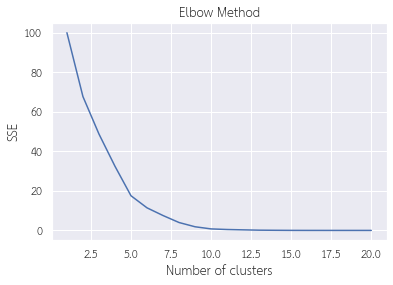

In [145]:
max_k = 21
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(k_mean_data_2564_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')


In [146]:
k=5
# เพราะเป็นค่า Number of cluster ที่่ให้ความชันมากที่สุด

In [147]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(k_mean_data_2564_normalized)

KMeans(n_clusters=5)

In [148]:

cluster_predictions = kmeans.predict(k_mean_data_2564_normalized)
k_mean_data_2564['cluster_id'] = cluster_predictions
k_mean_data_2564

,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,cluster_id
1,4104.5,3078.3,6104.3,12397.0,13606.8,1
2,91027.4,24102.9,14426.1,4794.4,80179.8,2
3,12988.2,6567.9,3421.2,599.4,244863.5,3
4,2697.3,2509.6,397.5,1348.7,1203.3,1
5,1572.6,892.1,1564.4,735.9,1327.7,1
6,2746.6,2519.3,397.8,16598.3,79.8,1
7,11248.4,939.9,9956.4,104384.6,1597.7,1
8,24376.6,11495.8,72292.8,2001.1,564.8,1
9,9704.7,2436.2,177009.1,57.1,751.6,0
10,1311.6,2009.9,1243.4,1945.8,1791.0,1


In [149]:
k_mean_data_2564.cluster_id.value_counts()

1    14
2     3
3     1
0     1
4     1
Name: cluster_id, dtype: int64

In [150]:
print(metrics.silhouette_score(k_mean_data_2564,kmeans.labels_))

print(metrics.davies_bouldin_score(k_mean_data_2564,kmeans.labels_))

0.5273282629866654
0.4940316543488489
